In [ ]:
!pip install --upgrade --force-reinstall pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

Saving dataset.zip to dataset (2).zip
Found 2648 files belonging to 2 classes.
Using 2119 files for training.
Found 2648 files belonging to 2 classes.
Using 529 files for validation.
클래스 순서: ['paper', 'plastic']


/tmp/ipython-input-4-2190675489.py:62: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Epoch 1/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9112 - loss: 0.2594 - val_accuracy: 0.9962 - val_loss: 0.0083
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 62s 922ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 61s 915ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 1.0000 - loss: 9.4235e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 74s 915ms/step - accuracy: 1.0000 - loss: 5.2611e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9781 - loss: 0.1120 - val_accuracy: 0.9962 - val_loss: 0.0070
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9994 - loss: 0.0141 - val_accuracy: 0.9962 - val_loss: 0.0061
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.

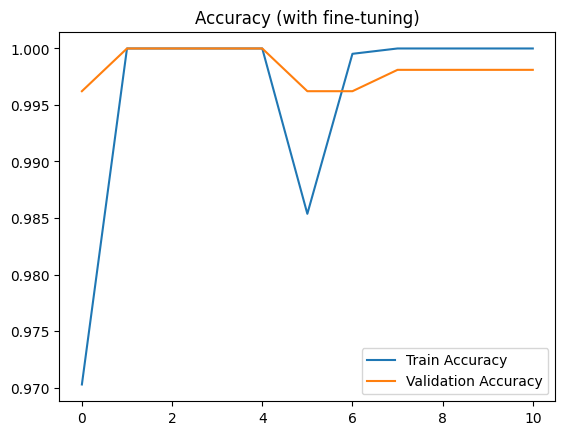

Saved artifact at '/content/trash_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_658')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137124278167376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278171024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278170256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278169872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278167568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278171984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278171792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278171408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278172944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124278169488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137124

In [ ]:
# 1. 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from pathlib import Path
from tensorflow.keras.preprocessing import image
from google.colab import files

# 2. Colab에서 dataset.zip 업로드
uploaded = files.upload()

# 3. 압축 해제
with zipfile.ZipFile("/content/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# 4. 하이퍼파라미터 설정
BATCH_SIZE = 32
IMG_SIZE = (180, 180)
DATA_DIR = "/content/dataset/dataset"

# 5. 이미지 데이터 불러오기
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("클래스 순서:", class_names)  # 예: ['paper', 'plastic']

# 6. 데이터 증강 레이어 정의
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.3),
])
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# 7. 성능 최적화
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 8. 사전학습 모델 불러오기
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(180, 180, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # 1단계 고정

# 9. 전체 모델 구성
inputs = tf.keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(2, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# 10. 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class_weight = {0: 1.0, 1: 2.0}  # plastic 강조

# 11. EarlyStopping 콜백
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# 12. 1단계 학습
initial_epochs = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs,
    class_weight=class_weight,
    callbacks=[early_stopping]
)

# 13. fine-tuning 준비
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# 14. 학습률 decay 스케줄
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 15. fine-tuning 학습
fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    class_weight=class_weight,
    callbacks=[early_stopping]
)

# 16. 시각화
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title("Accuracy (with fine-tuning)")
plt.legend()
plt.show()

# 17. 모델 저장
model.save("/content/trash_model.keras")         # ✅ 권장 Keras 포맷
model.save("/content/trash_model.h5")            # ✅ HDF5 포맷
model.export("/content/trash_model")             # ✅ SavedModel 포맷
print("✅ 모델 저장 완료")

# 18. 예측 함수
def predict_image(img_path):
    if not Path(img_path).exists():
        print(f"❌ 파일을 찾을 수 없습니다: {img_path}")
        return
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array / 255.0, axis=0)
    preds = model.predict(img_array)
    probs = tf.nn.softmax(preds[0]).numpy()
    predicted_class = np.argmax(probs)
    print(f"🧠 예측 결과: {class_names[predicted_class]} ({probs[predicted_class]*100:.2f}%)")
    print(f"🔍 Softmax 출력값: {probs}")

# 19. 테스트 예시 (파일 경로 정확히 지정!)
predict_image("/content/dataset/plastic/plastic101.jpg")
predict_image("/content/dataset/paper/paper101.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


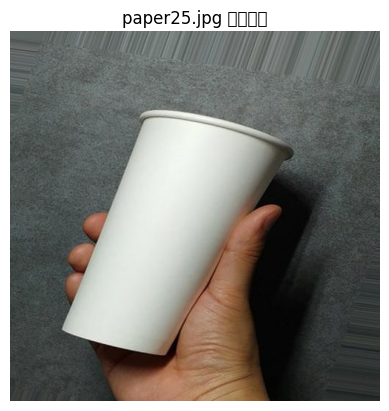

🧠 예측 결과: plastic (73.10%)
🔍 Softmax 출력값: [0.26903513 0.7309649 ]


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

# 테스트할 이미지 경로 설정 (파일명만 바꿔서 여러 개 테스트 가능)
img_path = "/content/dataset/dataset/paper/paper25.jpg"  # 실제 경로에 맞게 수정

def predict_image(img_path):
    # 이미지 로드 및 전처리
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array / 255.0, axis=0)

    # 예측
    preds = model.predict(img_array)
    probs = tf.nn.softmax(preds[0]).numpy()
    predicted_class = np.argmax(probs)

    # 시각화
    plt.imshow(image.load_img(img_path))
    plt.title(f"{os.path.basename(img_path)} 예측결과")
    plt.axis('off')
    plt.show()

    # 결과 출력
    print(f"🧠 예측 결과: {class_names[predicted_class]} ({probs[predicted_class]*100:.2f}%)")
    print(f"🔍 Softmax 출력값: {probs}")

# 예측 실행
predict_image(img_path)

